In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [31]:
df=pd.read_csv('telecom.csv')
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

# Basics of dataset

In [32]:
df.shape

(3333, 21)

In [33]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [34]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [35]:
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

# Checking missing values

In [36]:
count=df.isnull().sum()
count

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

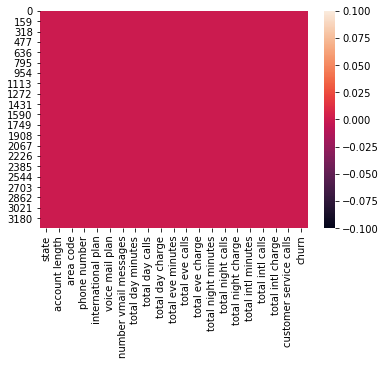

In [37]:
sns.heatmap(df.isnull())

# Visualization

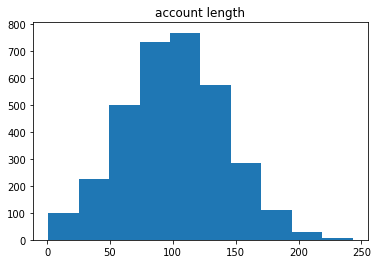

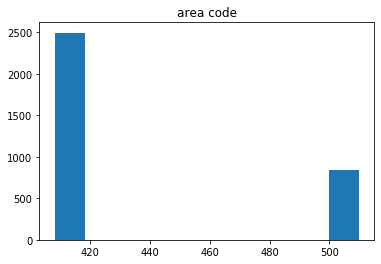

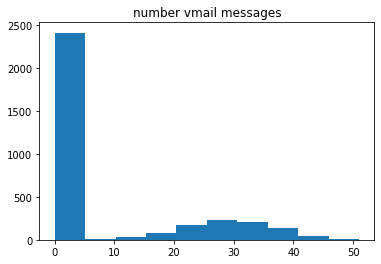

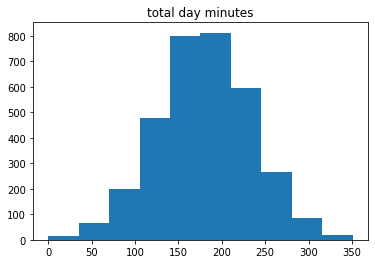

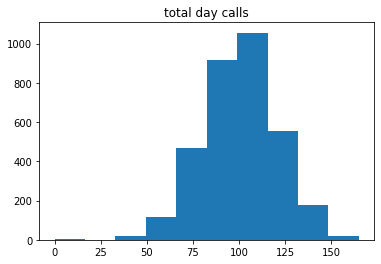

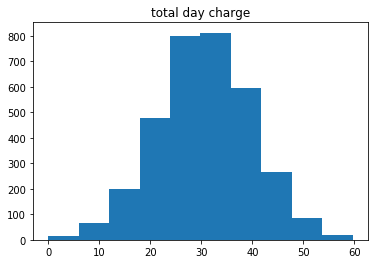

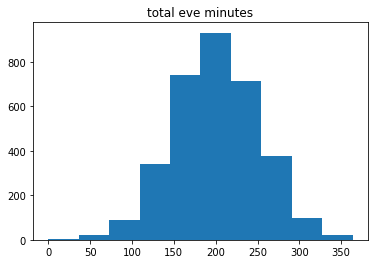

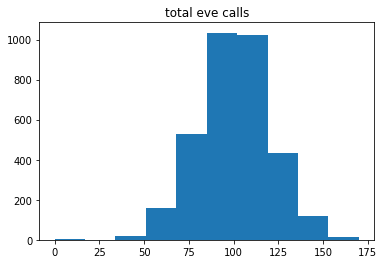

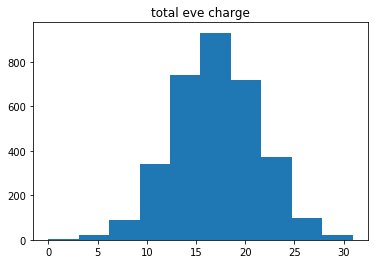

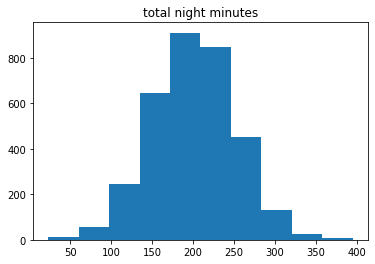

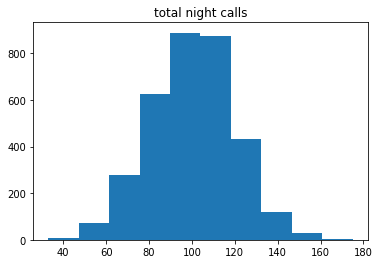

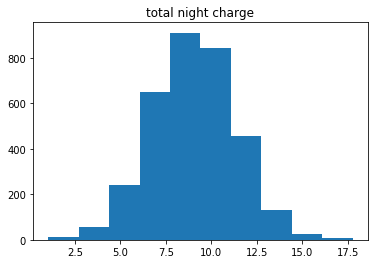

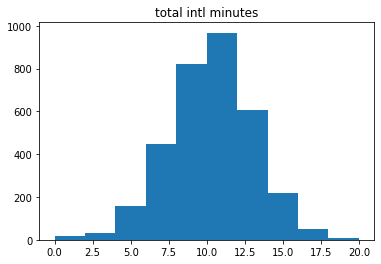

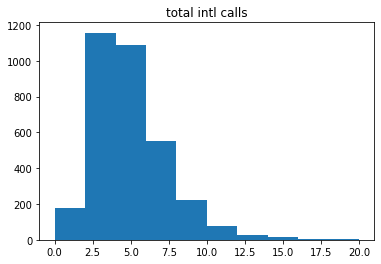

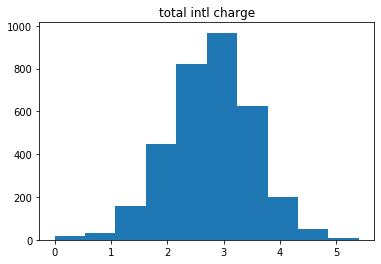

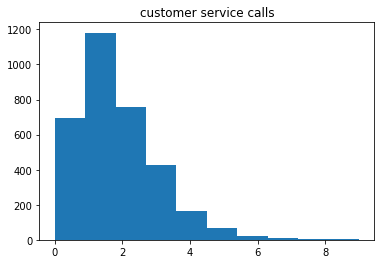

In [38]:
for i in ['account length','area code','number vmail messages','total day minutes','total day calls','total day charge','total eve minutes','total eve calls','total eve charge','total night minutes','total night calls','total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

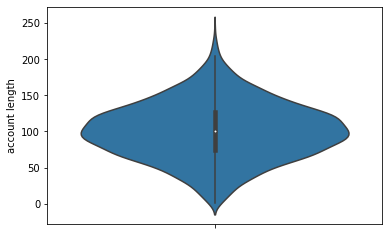

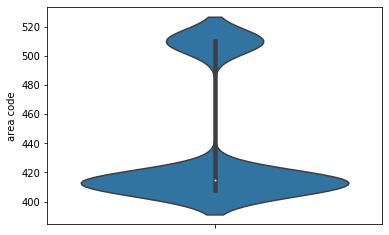

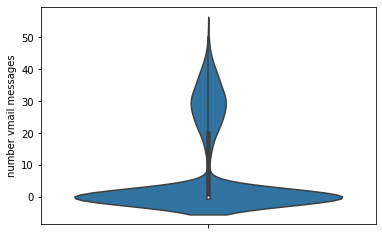

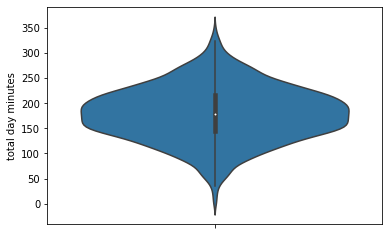

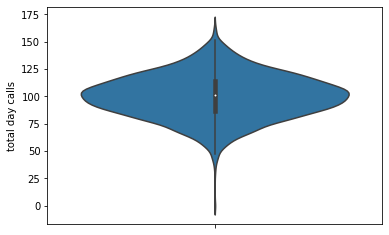

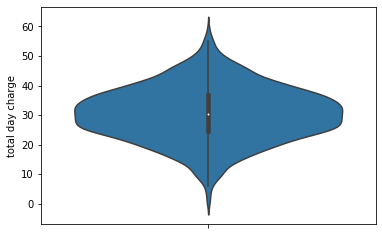

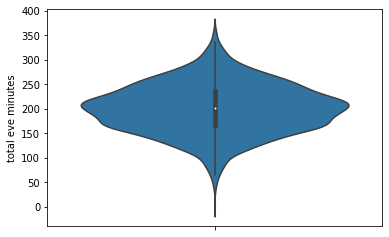

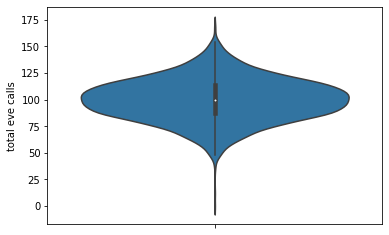

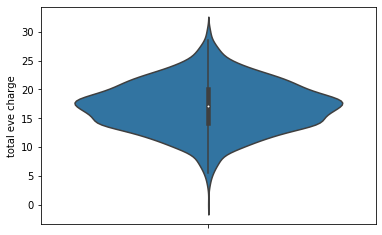

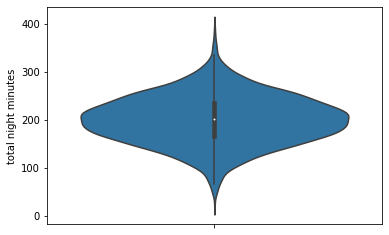

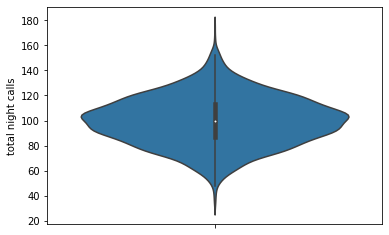

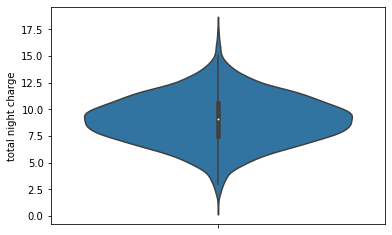

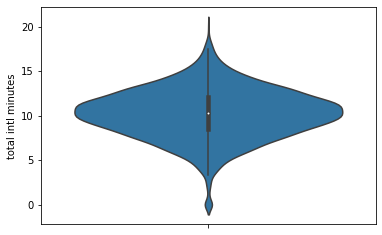

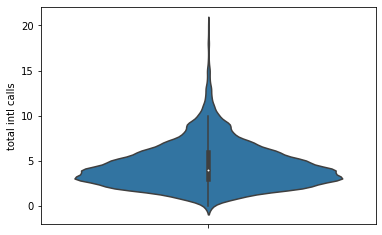

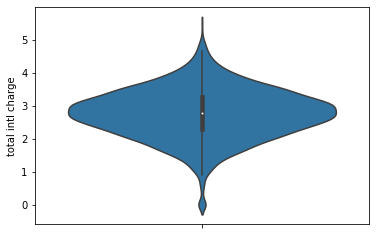

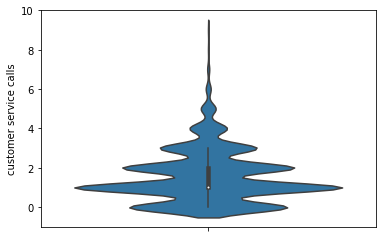

In [39]:
for i in ['account length','area code','number vmail messages','total day minutes','total day calls','total day charge','total eve minutes','total eve calls','total eve charge','total night minutes','total night calls','total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']:
    sns.violinplot(y=i,data=df)
    plt.show()

# Countplot

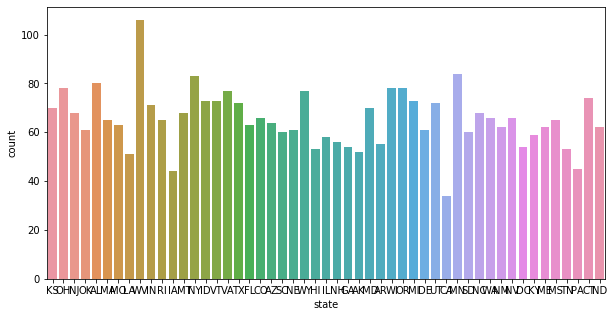

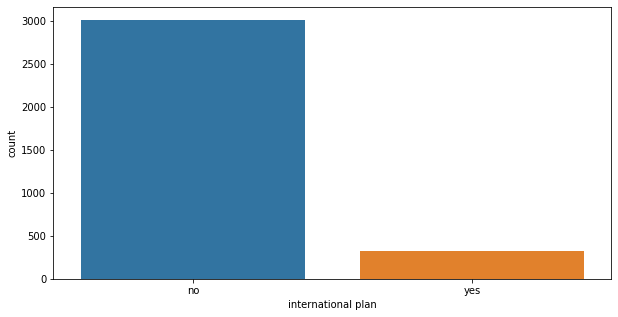

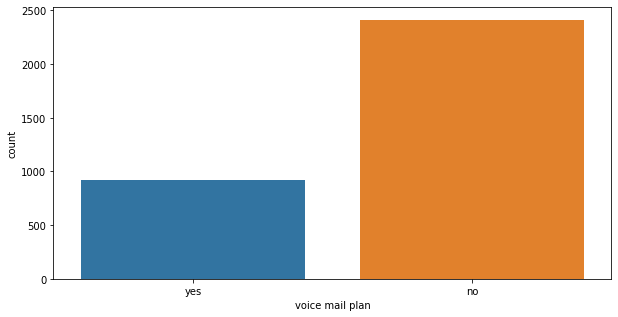

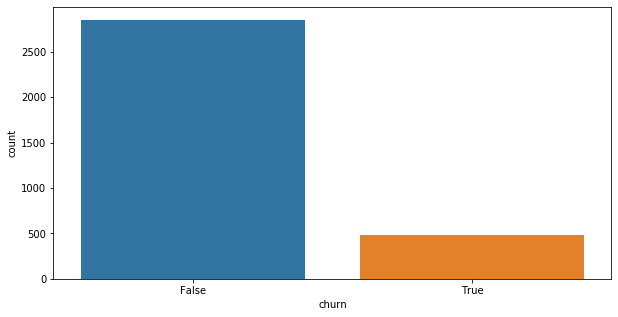

In [40]:
for i in ['state','international plan','voice mail plan','churn']:
    plt.figure(figsize=(10,5))
    sns.countplot(df[i])
    plt.show()

In [41]:
import statistics
for i in ['state']:
    print(statistics.mode(df[i]))

WV


# Catplot amongst various above columns

<Figure size 1440x360 with 0 Axes>

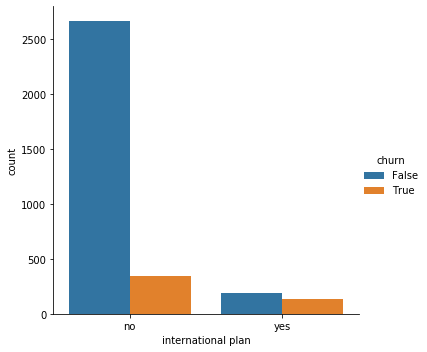

<Figure size 1440x360 with 0 Axes>

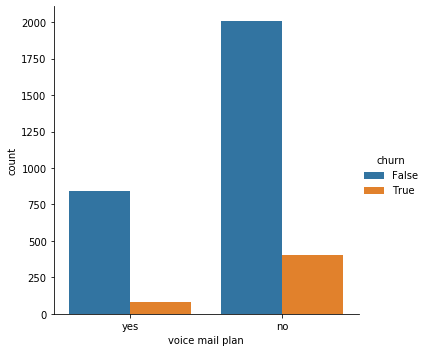

<Figure size 1440x360 with 0 Axes>

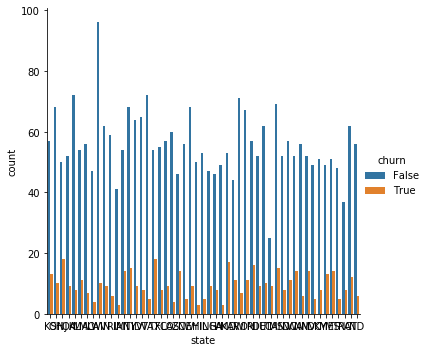

In [42]:
for i in ['international plan','voice mail plan','state']:
    plt.figure(figsize=(20,5))
    sns.catplot(x=i,kind='count',hue='churn',data=df)
    plt.show()

<Figure size 1440x360 with 0 Axes>

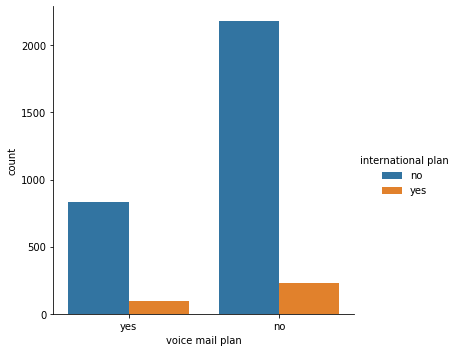

<Figure size 1440x360 with 0 Axes>

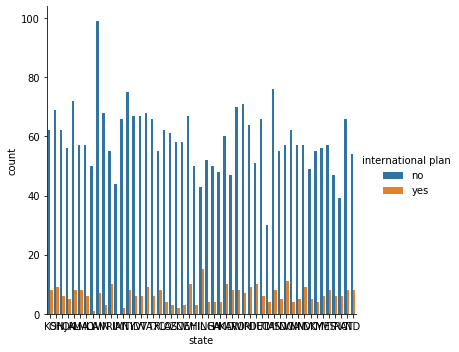

In [43]:
for i in ['voice mail plan','state']:
    plt.figure(figsize=(20,5))
    sns.catplot(x=i,kind='count',hue='international plan',data=df)
    plt.show()

# Pairplot

In [44]:
df["churn"]=df["churn"].astype(str)

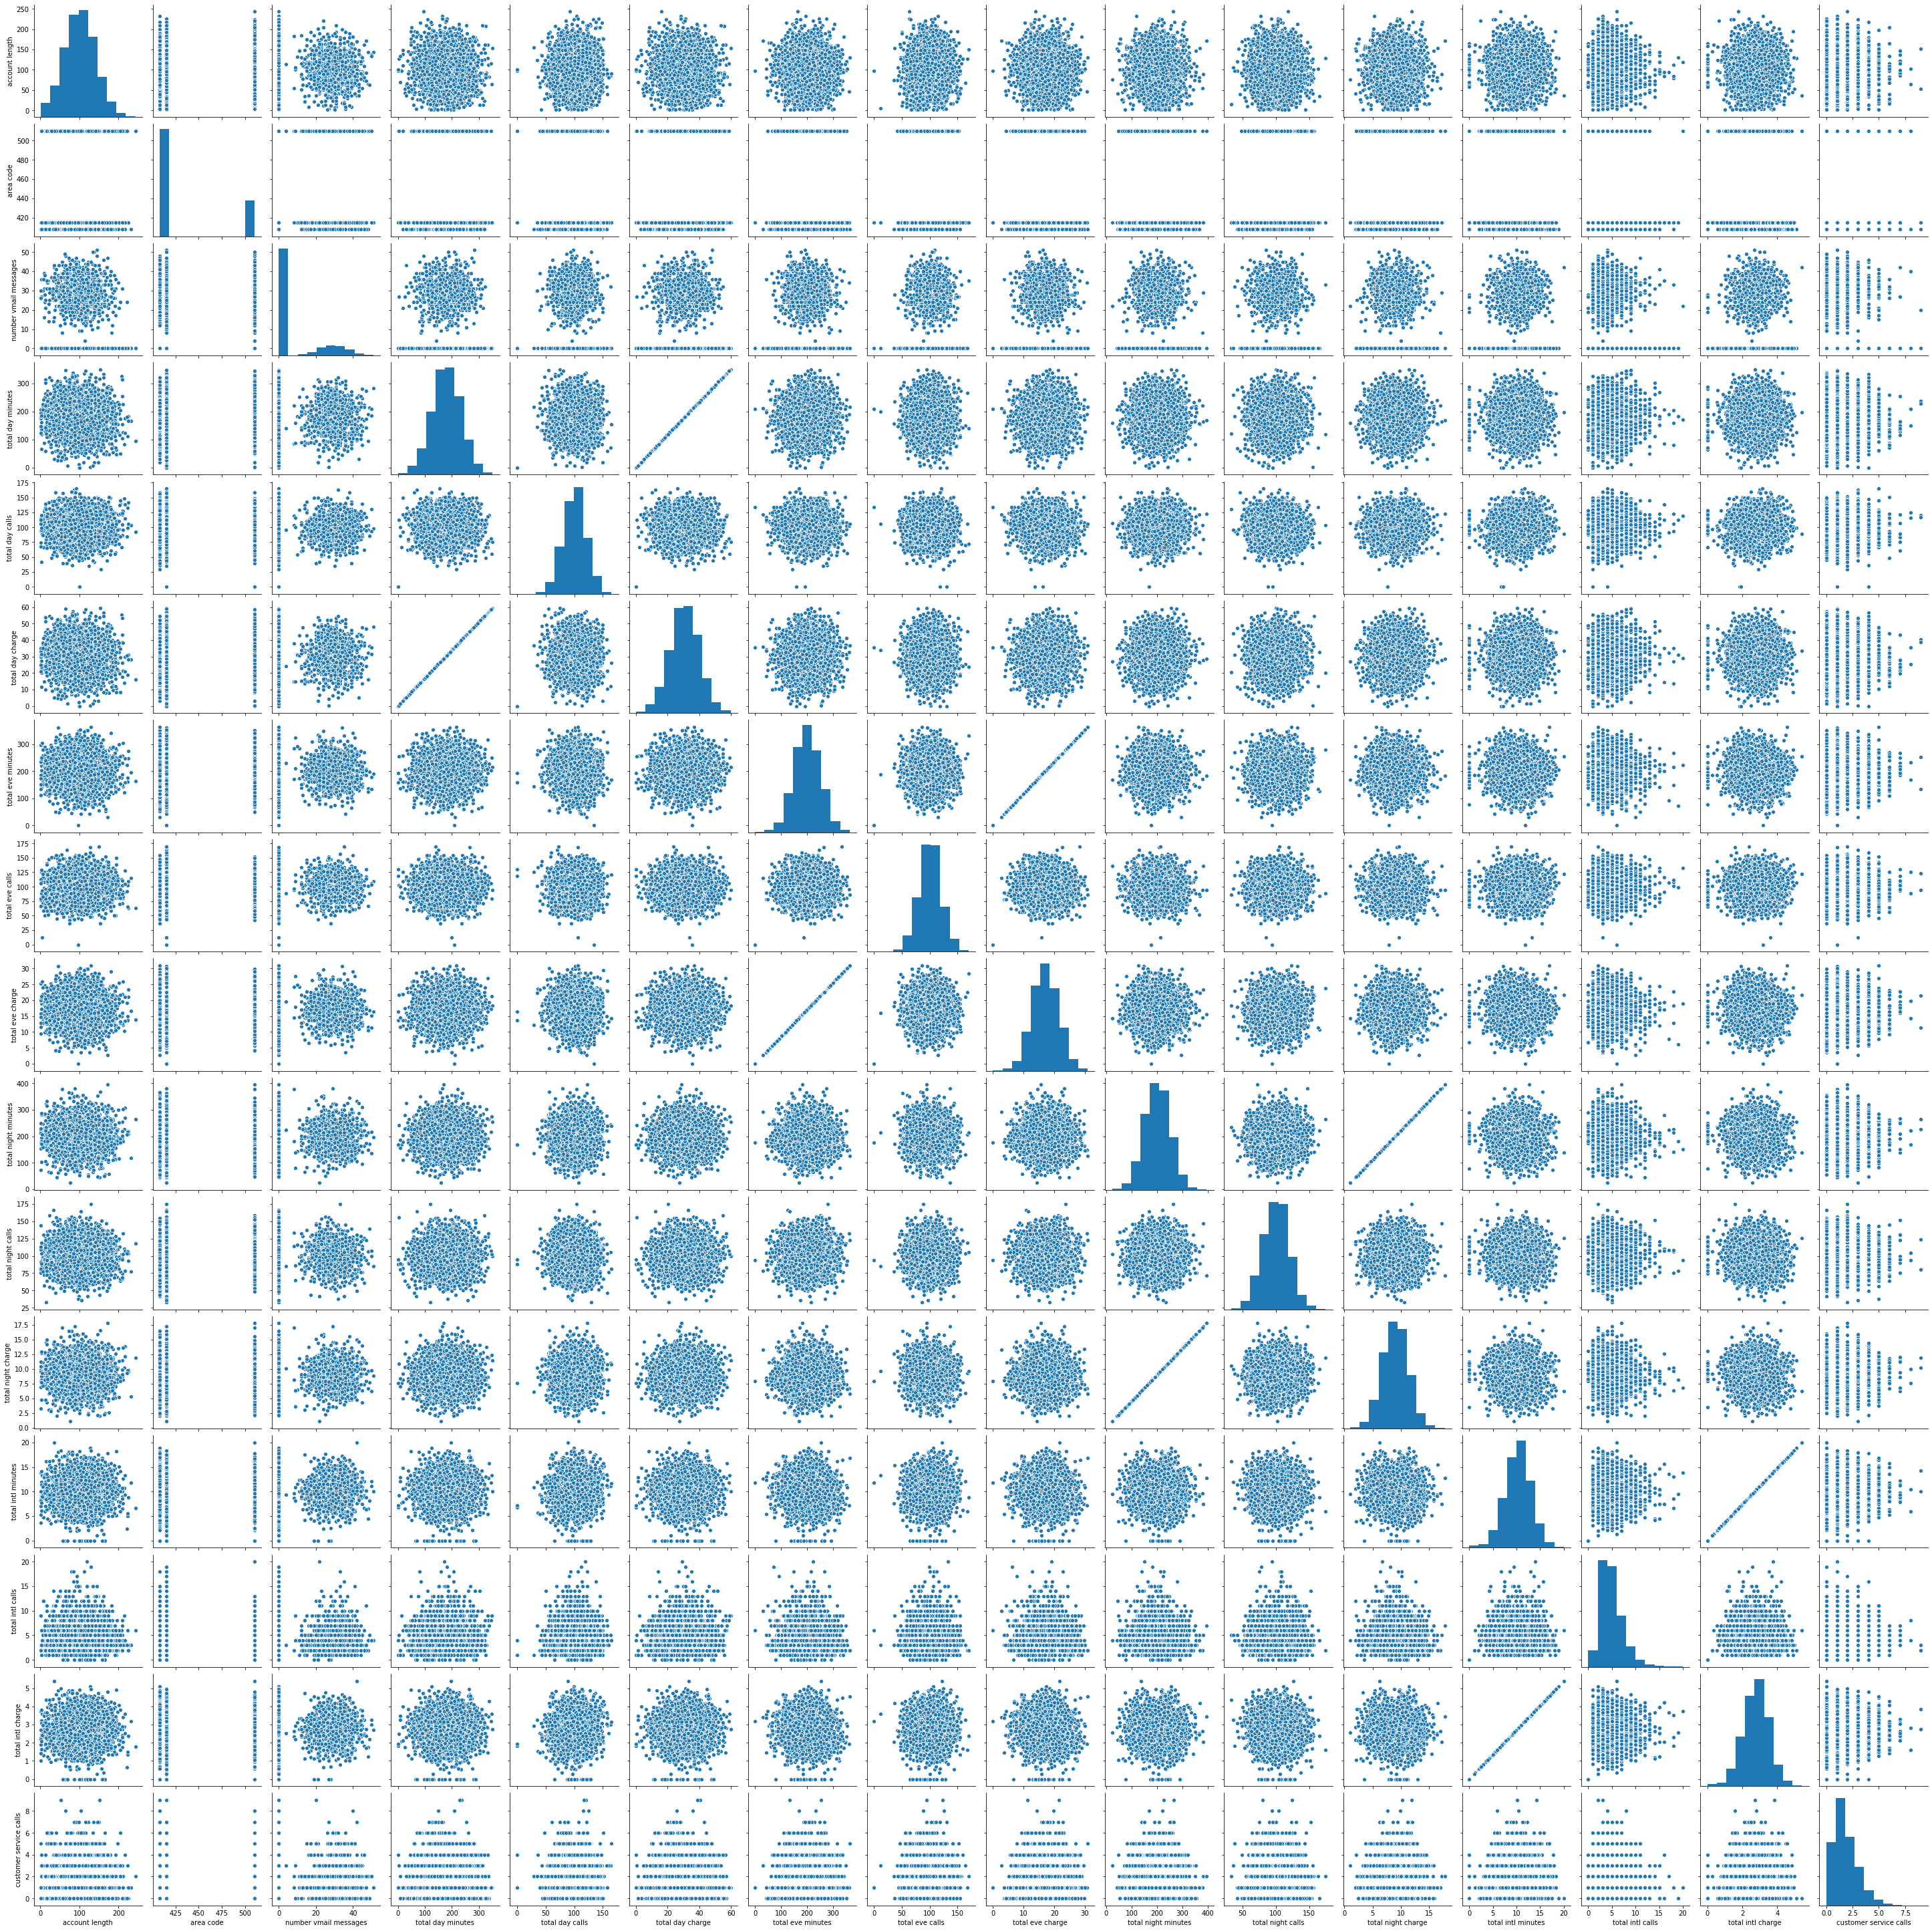

In [45]:
sns.pairplot(df)

# Correlation matrix

In [46]:
dco=df.corr()


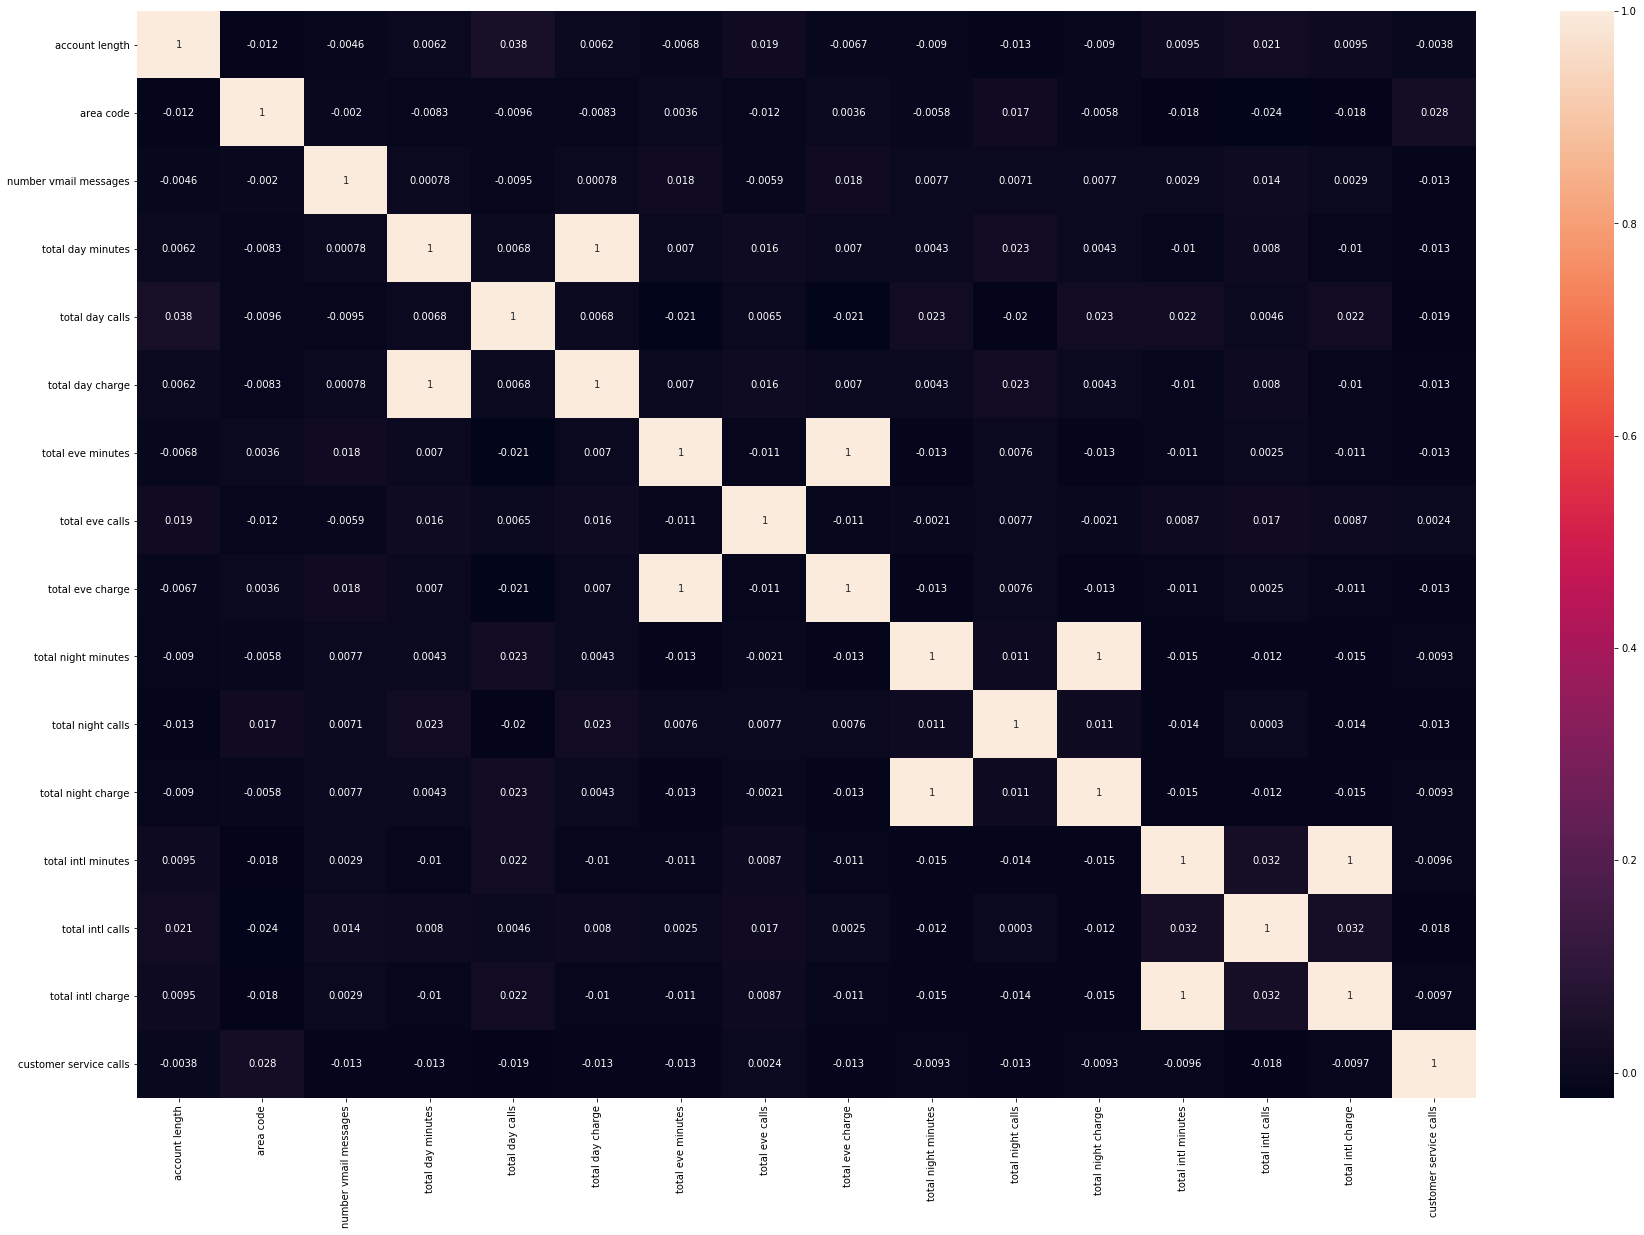

In [47]:
plt.figure(figsize=(30,20))
sns.heatmap(dco,annot=True)

# Using Labelencoder to transform object values into usable numeric data

In [48]:
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [49]:
df.drop(columns=['phone number'],inplace=True)

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
for i in ['state','international plan','voice mail plan','churn']:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])


In [52]:
df.head()

state  account length  area code  international plan  voice mail plan  \
0     16             128        415                   0                1   
1     35             107        415                   0                1   
2     31             137        415                   0                0   
3     35              84        408                   1                0   
4     36              75        415                   1                0   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

In [53]:
df.dtypes

state                       int32
account length              int64
area code                   int64
international plan          int32
voice mail plan             int32
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int32
dtype: object

# Statistics Summary

In [54]:
df.describe()

state  account length    area code  international plan  \
count  3333.000000     3333.000000  3333.000000         3333.000000   
mean     26.059406      101.064806   437.182418            0.096910   
std      14.824911       39.822106    42.371290            0.295879   
min       0.000000        1.000000   408.000000            0.000000   
25%      14.000000       74.000000   408.000000            0.000000   
50%      26.000000      101.000000   415.000000            0.000000   
75%      39.000000      127.000000   510.000000            0.000000   
max      50.000000      243.000000   510.000000            1.000000   

       voice mail plan  number vmail messages  total day minutes  \
count      3333.000000            3333.000000        3333.000000   
mean          0.276628               8.099010         179.775098   
std           0.447398              13.688365          54.467389   
min           0.000000               0.000000           0.000000   
25%           0.000000               0.000000         143.700000   
50%           0.000000               0.000000         179.400000   
75%           1.000000              20.000000         216.400000   
max           1.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls        churn  
count        3333.000000             3333.000000  3333.000000  
mean            2.764581                1.562856     0.144914  
std             0.753773                1.315491     0.352067  
min             0.000000                0.000000     0.000000  
25%             2.300000                1.000000     0.000000  
50%             2.780000                1.000000     0.000000  
75%             3.270000                2.000000     0.000000  
max             5.400000                9.000000     1.000000

# Checking for skewness and outliers distribution:-

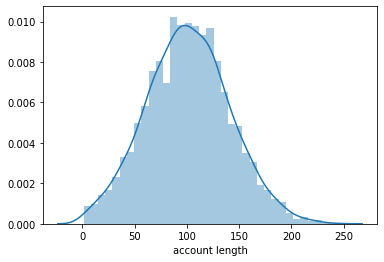

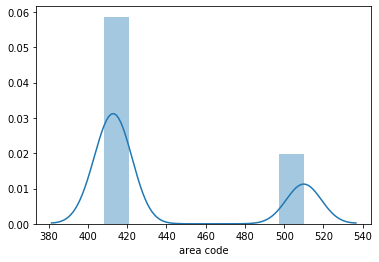

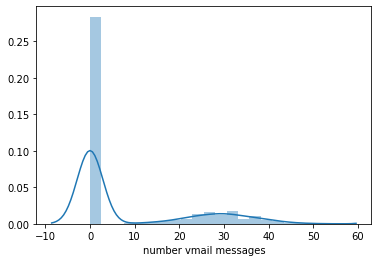

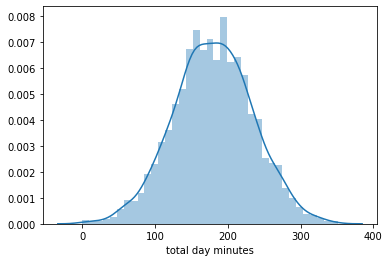

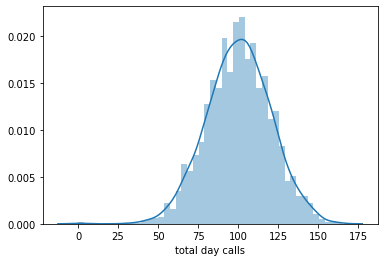

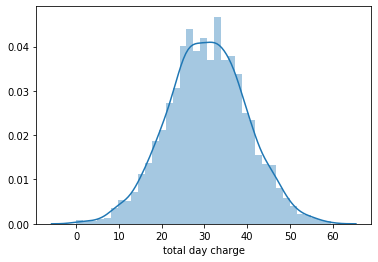

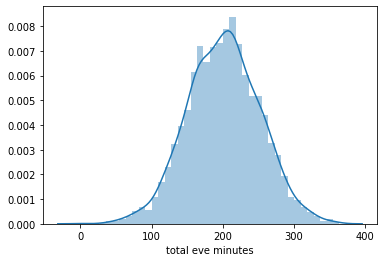

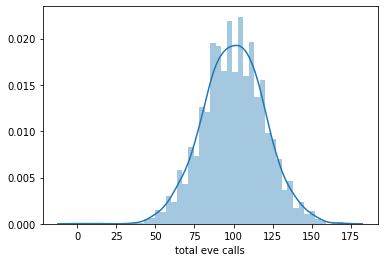

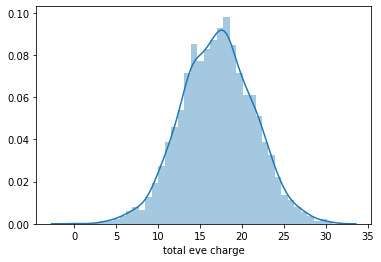

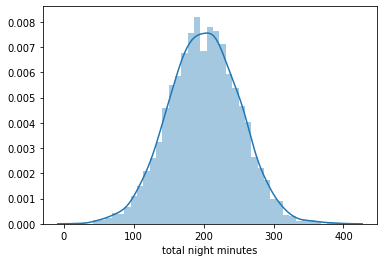

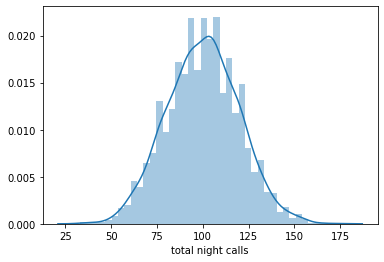

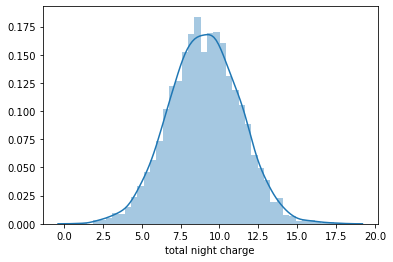

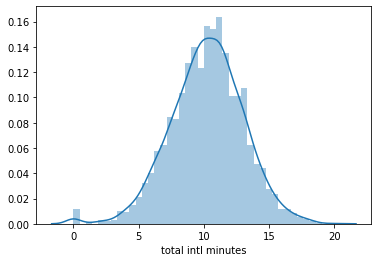

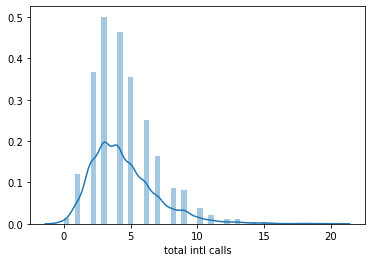

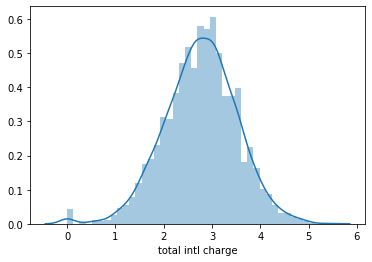

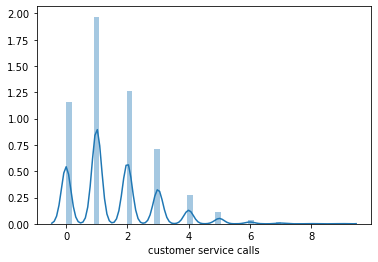

In [55]:
for i in ['account length','area code','number vmail messages','total day minutes','total day calls','total day charge','total eve minutes','total eve calls','total eve charge','total night minutes','total night calls','total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']:
    sns.distplot(df[i])
    plt.show()
    

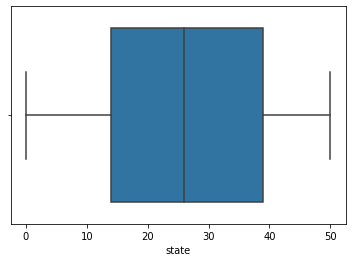

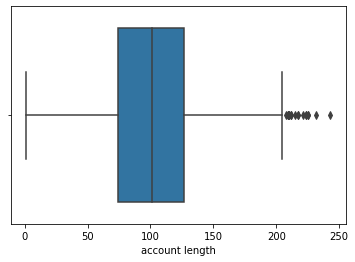

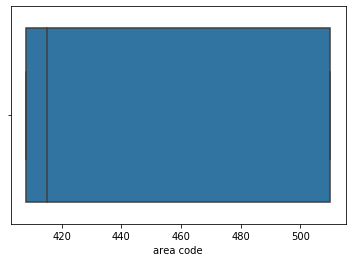

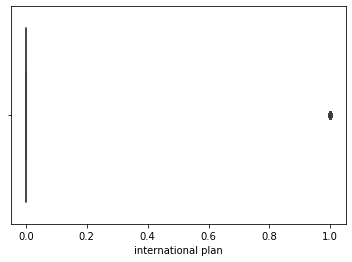

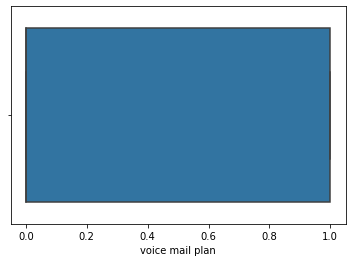

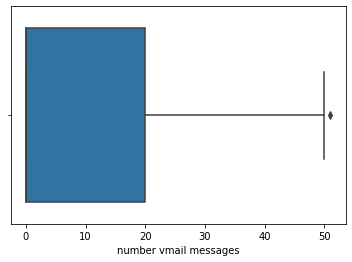

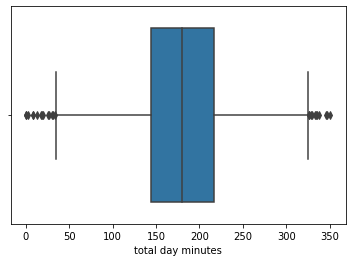

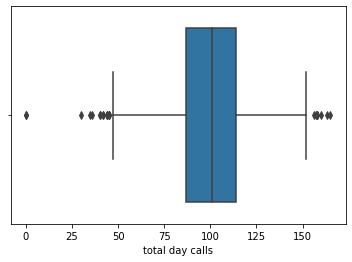

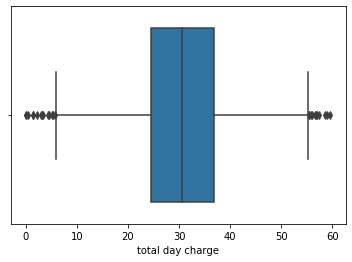

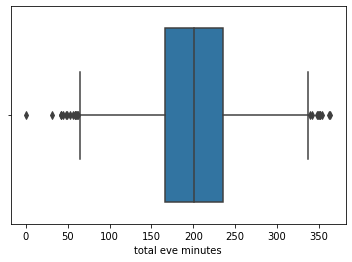

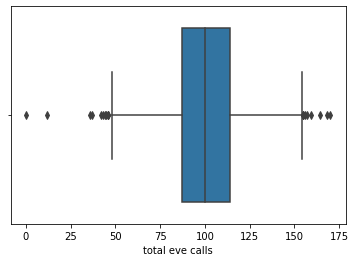

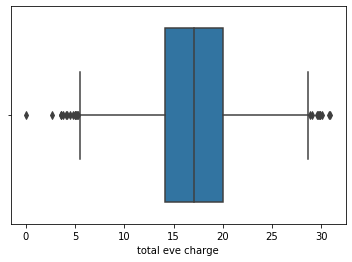

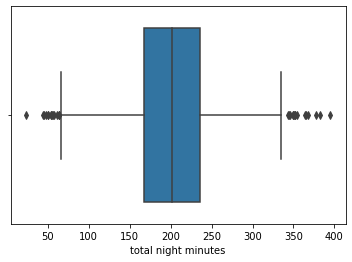

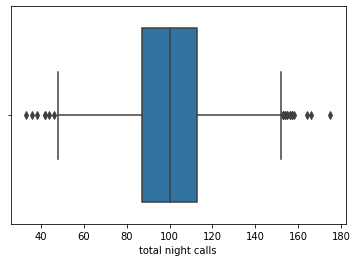

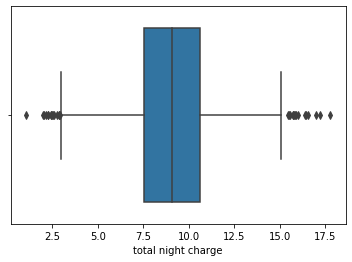

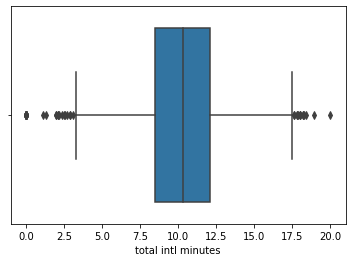

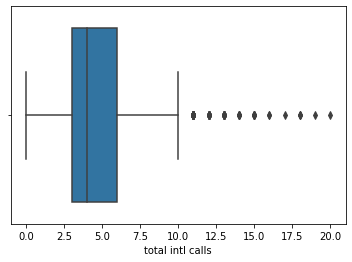

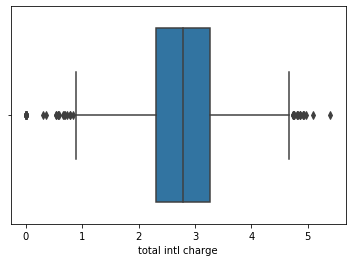

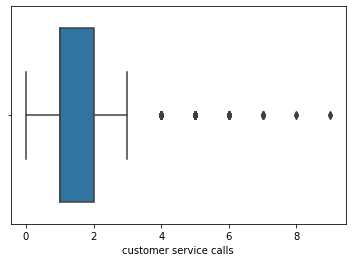

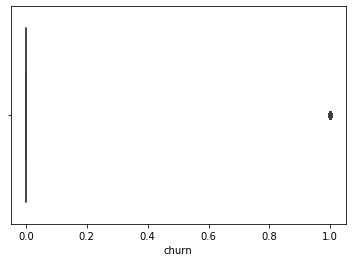

In [56]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

# Removing outliers

In [57]:
from scipy.stats import zscore

In [58]:
z_score=abs(zscore(df))
print(df.shape)
dffinal=df.loc[(z_score<3).all(axis=1)]
print(dffinal.shape)

(3333, 20)
(2860, 20)


In [59]:
dffinal.skew()

state                    -0.061310
account length            0.082671
area code                 1.149801
international plan        0.000000
voice mail plan           1.021156
number vmail messages     1.284367
total day minutes         0.010576
total day calls           0.019286
total day charge          0.010566
total eve minutes        -0.011165
total eve calls          -0.017569
total eve charge         -0.011133
total night minutes      -0.047061
total night calls         0.003426
total night charge       -0.047097
total intl minutes       -0.032943
total intl calls          0.761069
total intl charge        -0.032821
customer service calls    0.723635
churn                     2.497630
dtype: float64

In [60]:
xn=dffinal.drop(columns=['churn'])
yn=dffinal['churn']

In [61]:
for col in xn.columns:
    if xn.skew().loc[col]>0.55:
        xn[col]=np.log1p(xn[col])

In [62]:
xn.skew()

state                    -0.061310
account length            0.082671
area code                 1.145774
international plan        0.000000
voice mail plan           1.021156
number vmail messages     1.050188
total day minutes         0.010576
total day calls           0.019286
total day charge          0.010566
total eve minutes        -0.011165
total eve calls          -0.017569
total eve charge         -0.011133
total night minutes      -0.047061
total night calls         0.003426
total night charge       -0.047097
total intl minutes       -0.032943
total intl calls         -0.176838
total intl charge        -0.032821
customer service calls   -0.236016
dtype: float64

# Now,scaling of data has to be done

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scale=StandardScaler()
xn=scale.fit_transform(xn)


In [65]:
xd=pd.DataFrame(xn)

In [66]:
xd.skew()

0    -0.061310
1     0.082671
2     1.145774
3     0.000000
4     1.021156
5     1.050188
6     0.010576
7     0.019286
8     0.010566
9    -0.011165
10   -0.017569
11   -0.011133
12   -0.047061
13    0.003426
14   -0.047097
15   -0.032943
16   -0.176838
17   -0.032821
18   -0.236016
dtype: float64

In [67]:
xd.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
dtype: int64

In [68]:
yn.isnull().sum()

0

# Splitting the dataset at 20% into train and test dataset 

In [70]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xd,yn,test_size=.20,random_state=42)

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals import joblib

In [72]:
print(xtrain.shape,xtest.shape)

(2288, 19) (572, 19)


In [73]:
print(ytrain.shape,ytest.shape)

(2288,) (572,)


In [74]:
def maxacc_score(regr,xd,yn):
    max_ac_score=0
    for r_state in range(42,100):
        xtrain,xtest,ytrain,ytest=train_test_split(xd,yn,test_size=.20,random_state=r_state)
        regr.fit(xtrain,ytrain)
        ypred=regr.predict(xtest)
        acc_scr=accuracy_score(ytest,ypred)
        print('acc score corresponding to ',r_state,'is',acc_scr)
        if acc_scr> max_ac_score:
            max_ac_score= acc_scr
            finalrstate=r_state
    print('max acc score corresponding to',finalrstate,'is',max_ac_score)
    return finalrstate

# Gridsearch CV

In [75]:
lr = LogisticRegression()
svc = SVC(probability=True)
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()

parameters={'C': [ 10, 1.0, 0.1, 0.01]}
clf=GridSearchCV(lr,parameters)
clf.fit(xd,yn)
print('best LR parameters is :',clf.best_params_)
print('\n')
parameters={'C': [100, 10, 1.0, 0.1,0.01],'kernel':['poly', 'rbf']}
clf=GridSearchCV(svc,parameters)
clf.fit(xd,yn)
print('best SVC parameters is :',clf.best_params_)
print('\n')
parameters={'criterion':['gini', 'entropy']}
clf=GridSearchCV(dtc,parameters)
clf.fit(xd,yn)
print('best DTC parameters is :',clf.best_params_)
print('\n')
parameters={'n_neighbors':range(1,30)}
clf=GridSearchCV(knc,parameters)
clf.fit(xd,yn)
print('best KNC parameters is :',clf.best_params_)
print('\n')
parameters={'n_estimators':[50,100,150,200,250,300]}
clf=GridSearchCV(rfc,parameters,cv=5)
clf.fit(xd,yn)
print('best RFC parameters is :',clf.best_params_)
print('\n')
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[50,100,150,200,250,300]}
clf=GridSearchCV(gbc,parameters,cv=5)
clf.fit(xd,yn)
print('best GBC parameters is :',clf.best_params_)
print('\n')
parameters={'learning_rate':[0.01,0.1,1],'n_estimators':[50,100,150,200,250,300],'base_estimator':[lr,dtc]}
clf=GridSearchCV(ada,parameters,cv=5)
clf.fit(xd,yn)
print('best ADACLASS parameters is :',clf.best_params_)
print('\n')

best LR parameters is : {'C': 10}


best SVC parameters is : {'C': 10, 'kernel': 'rbf'}


best DTC parameters is : {'criterion': 'entropy'}


best KNC parameters is : {'n_neighbors': 5}


best RFC parameters is : {'n_estimators': 300}


best GBC parameters is : {'learning_rate': 0.1, 'n_estimators': 100}


best ADACLASS parameters is : {'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), 'learning_rate': 1, 'n_estimators': 200}




In [76]:
gn=GaussianNB()
r_state=maxacc_score(gn,xd,yn)
print('\n')
svc=SVC(C=10,kernel='rbf')
r_state=maxacc_score(svc,xd,yn)
print('\n')
lr = LogisticRegression(C=10)
r_state=maxacc_score(lr,xd,yn)
print('\n')
dtc=DecisionTreeClassifier(criterion='entropy')
r_state=maxacc_score(dtc,xd,yn)
print('\n')
knc=KNeighborsClassifier(n_neighbors= 5)
r_state=maxacc_score(knc,xd,yn)
print('\n')
rfc=RandomForestClassifier(n_estimators=300)
r_state=maxacc_score(rfc,xd,yn)
print('\n')
gbc=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100)
r_state=maxacc_score(gbc,xd,yn)
print('\n')
ada=AdaBoostClassifier(learning_rate=1,n_estimators=200,base_estimator=dtc)
r_state=maxacc_score(ada,xd,yn)
print('\n')

acc score corresponding to  42 is 0.9195804195804196
acc score corresponding to  43 is 0.9020979020979021
acc score corresponding to  44 is 0.9195804195804196
acc score corresponding to  45 is 0.9248251748251748
acc score corresponding to  46 is 0.9423076923076923
acc score corresponding to  47 is 0.9178321678321678
acc score corresponding to  48 is 0.9125874125874126
acc score corresponding to  49 is 0.9143356643356644
acc score corresponding to  50 is 0.916083916083916
acc score corresponding to  51 is 0.8968531468531469
acc score corresponding to  52 is 0.9020979020979021
acc score corresponding to  53 is 0.9143356643356644
acc score corresponding to  54 is 0.9125874125874126
acc score corresponding to  55 is 0.916083916083916
acc score corresponding to  56 is 0.916083916083916
acc score corresponding to  57 is 0.9265734265734266
acc score corresponding to  58 is 0.9300699300699301
acc score corresponding to  59 is 0.9108391608391608
acc score corresponding to  60 is 0.9108391608391

acc score corresponding to  81 is 0.9055944055944056
acc score corresponding to  82 is 0.9108391608391608
acc score corresponding to  83 is 0.8951048951048951
acc score corresponding to  84 is 0.8898601398601399
acc score corresponding to  85 is 0.916083916083916
acc score corresponding to  86 is 0.9125874125874126
acc score corresponding to  87 is 0.8968531468531469
acc score corresponding to  88 is 0.9178321678321678
acc score corresponding to  89 is 0.8916083916083916
acc score corresponding to  90 is 0.9090909090909091
acc score corresponding to  91 is 0.9108391608391608
acc score corresponding to  92 is 0.9143356643356644
acc score corresponding to  93 is 0.9055944055944056
acc score corresponding to  94 is 0.9178321678321678
acc score corresponding to  95 is 0.9178321678321678
acc score corresponding to  96 is 0.8916083916083916
acc score corresponding to  97 is 0.8916083916083916
acc score corresponding to  98 is 0.9178321678321678
acc score corresponding to  99 is 0.92482517482

acc score corresponding to  59 is 0.9440559440559441
acc score corresponding to  60 is 0.965034965034965
acc score corresponding to  61 is 0.9597902097902098
acc score corresponding to  62 is 0.9493006993006993
acc score corresponding to  63 is 0.9702797202797203
acc score corresponding to  64 is 0.951048951048951
acc score corresponding to  65 is 0.9615384615384616
acc score corresponding to  66 is 0.9405594405594405
acc score corresponding to  67 is 0.9370629370629371
acc score corresponding to  68 is 0.958041958041958
acc score corresponding to  69 is 0.9458041958041958
acc score corresponding to  70 is 0.9423076923076923
acc score corresponding to  71 is 0.9475524475524476
acc score corresponding to  72 is 0.9475524475524476
acc score corresponding to  73 is 0.9370629370629371
acc score corresponding to  74 is 0.951048951048951
acc score corresponding to  75 is 0.951048951048951
acc score corresponding to  76 is 0.9545454545454546
acc score corresponding to  77 is 0.959790209790209

acc score corresponding to  96 is 0.9073426573426573
acc score corresponding to  97 is 0.9335664335664335
acc score corresponding to  98 is 0.9248251748251748
acc score corresponding to  99 is 0.9178321678321678
max acc score corresponding to 42 is 0.9440559440559441




In [77]:
models=[]
models.append(('GNB',gn))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DTC',dtc))
models.append(('kNeighborsClassifier',knc))
models.append(('RFC',rfc))
models.append(('GBC',gbc))
models.append(('ADACLASS',ada))

In [78]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import cross_val_score

****,name,****


GaussianNB(priors=None, var_smoothing=1e-09)


accuracy score 0.9195804195804196


Cross val score 0.9185314685314685


roc_auc score 0.7467455621301775


classification report
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       507
           1       0.69      0.52      0.60        65

    accuracy                           0.92       572
   macro avg       0.82      0.75      0.78       572
weighted avg       0.91      0.92      0.91       572



[[492  15]
 [ 31  34]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****,name,****


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


accuracy score 0.9388111888111889


Cross val score 0.933916083916084


roc_auc score 0.8045364891518738


classification report
        

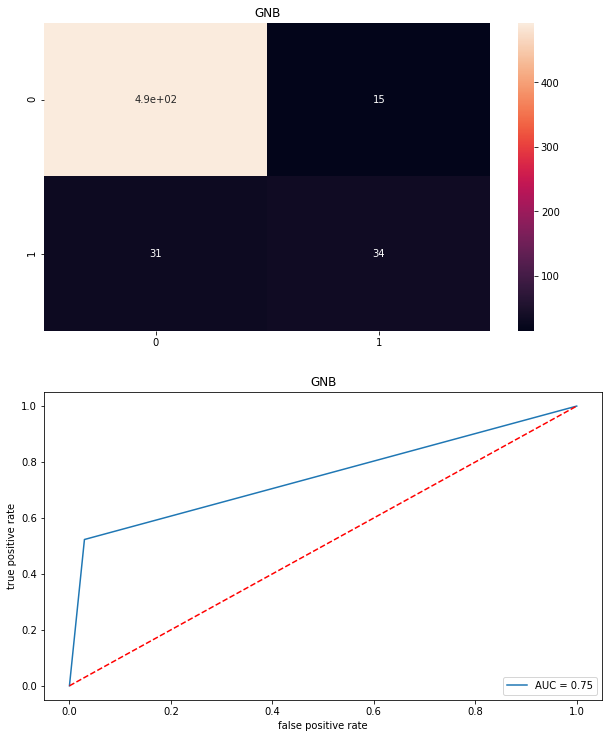

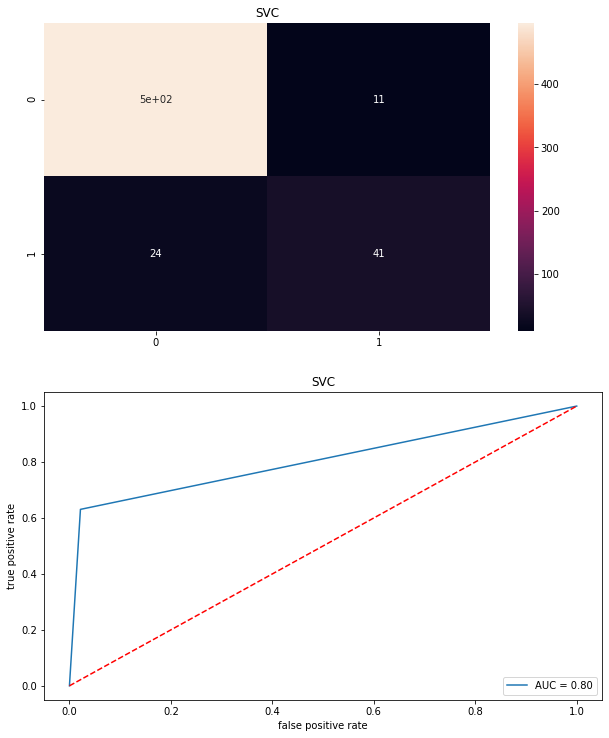

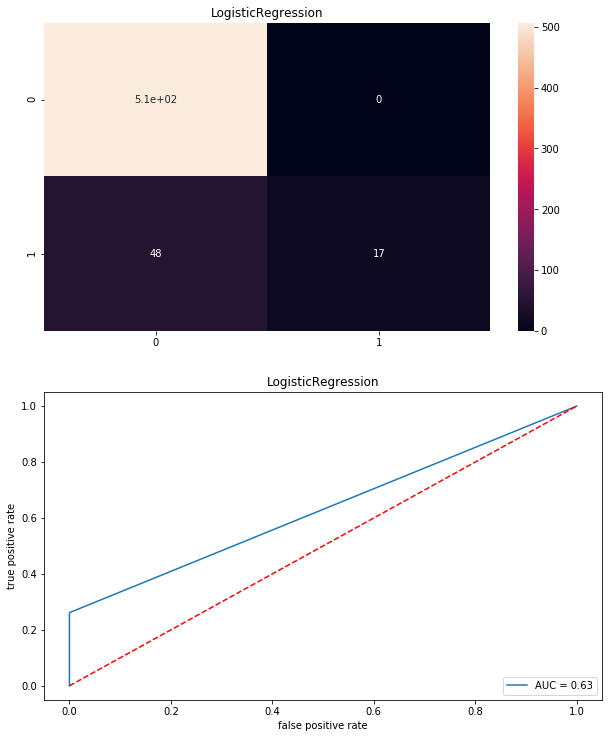

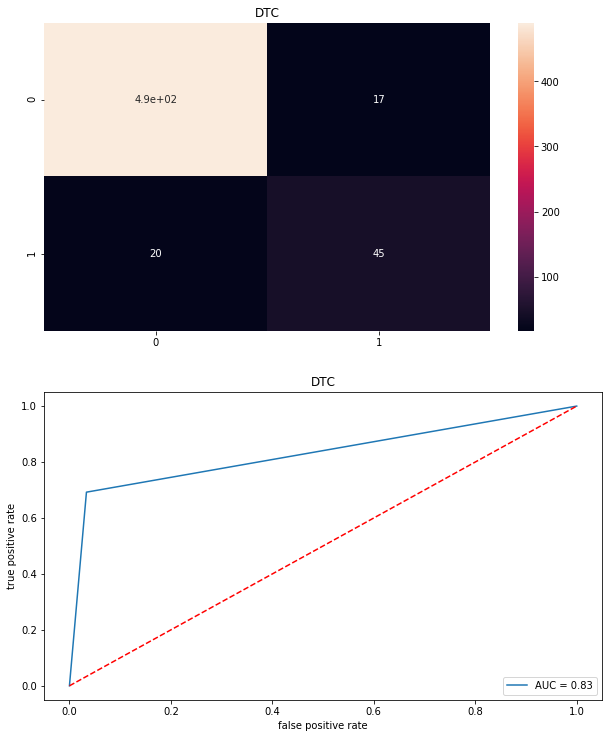

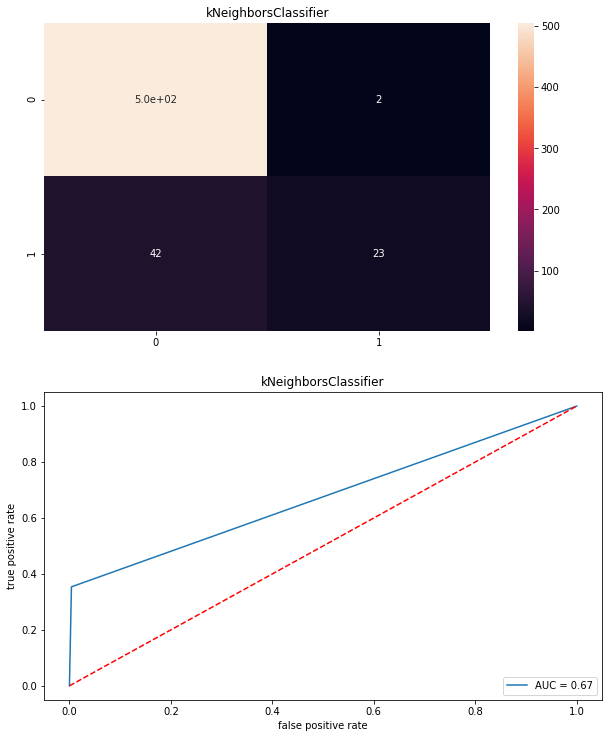

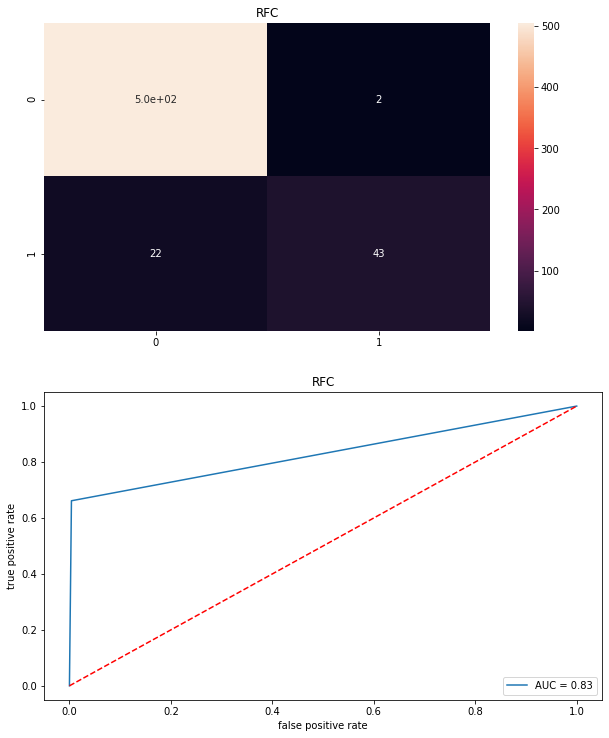

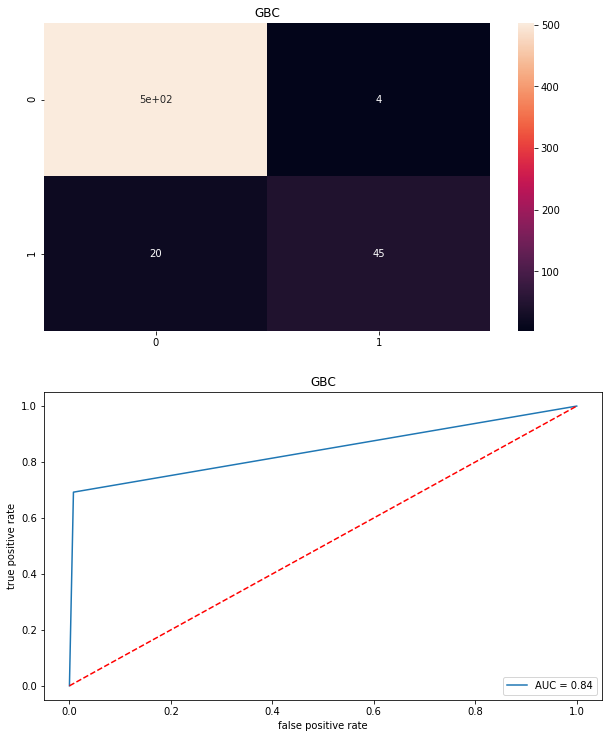

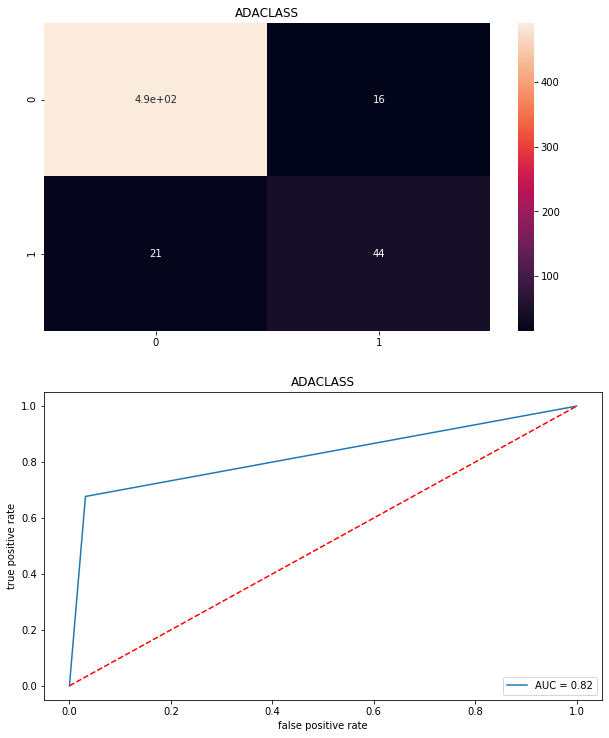

In [79]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('****,name,****')
    print('\n')
    Model.append(name)
    model.fit(xtrain,ytrain)
    print(model)
    pre=model.predict(xtest)
    print('\n')
    AS=accuracy_score(ytest,pre)
    print('accuracy score',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,xd,yn,cv=5,scoring='accuracy').mean()
    print('Cross val score',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(ytest,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification report\n',classification_report(ytest,pre))
    print('\n')
    cm=confusion_matrix(ytest,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,60))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot( false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('true positive rate')
    plt.xlabel('false positive rate')
    print('\n\n')
    

In [80]:
result=pd.DataFrame({'Model':Model,'Accuracy_score': score,'Cross val score': cvs,'Roc_auc_curve':rocscore})
result

Model  Accuracy_score  Cross val score  Roc_auc_curve
0                   GNB       91.958042        91.853147      74.674556
1                   SVC       93.881119        93.391608      80.453649
2    LogisticRegression       91.608392        90.699301      63.076923
3                   DTC       93.531469        92.867133      82.938856
4  kNeighborsClassifier       92.307692        91.503497      67.495069
5                   RFC       95.804196        95.664336      82.879684
6                   GBC       95.804196        95.174825      84.220907
7              ADACLASS       93.531469        92.552448      82.268245

# After having tried all the above models , RFC is working best
Also, random state corresponding to max acc score in RFC is 43

In [81]:
xtrain,xtest,ytrain,ytest=train_test_split(xd,yn,test_size=.20,random_state=43)
rfc=RandomForestClassifier(n_estimators=300)
rfc.fit(xtrain,ytrain)
ypred=rfc.predict(xtest)

# Final model is as follows

In [82]:
print('accuracy score of RFC is',accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
print('\n')

accuracy score of RFC is 0.9702797202797203
[[520   3]
 [ 14  35]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       523
           1       0.92      0.71      0.80        49

    accuracy                           0.97       572
   macro avg       0.95      0.85      0.89       572
weighted avg       0.97      0.97      0.97       572





roc_auc score 0.8542747883092052





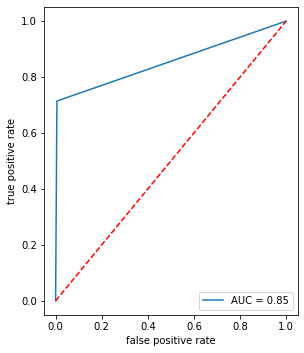

In [83]:
false_positive_rate,true_positive_rate,thresholds=roc_curve(ytest,ypred)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc score',roc_auc)
plt.figure(figsize=(10,60))
plt.subplot(922)
plt.plot( false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('true positive rate')
plt.xlabel('false positive rate')
print('\n\n')
    

In [84]:
joblib.dump(rfc,'Model_telecom.obj')

['Model_telecom.obj']

In [85]:
model=joblib.load('Model_telecom.obj')

In [86]:
model.predict(xtest)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,